In [1]:
import numpy as np
import psana as ps
import matplotlib.pyplot as plt
import sys
import time
import pickle
import os
from Functions import *
from raw_data_class import RawData as RDC
#from processed_data_class import ProData as PDC
%matplotlib notebook

In [8]:
save_dir = '/cds/home/b/bpoult/LCLS_LV_27_Data_Analysis/sample_data/'
calib_dir = '/cds/home/b/bpoult/LCLS_LV_27_Data_Analysis/calibrations/'
runs = list(range(207,214)) # goes from first value in range to last - 1
epix_roi = [80,140,170,330]
xrt_roi = [725,1500]
calibration_file = 'calibration_1'

# Processing or Loading
process_raw = False
on_off = True # Do you want to plot the raw data?
plot_one = 208
x_axis = 'energy' # 'pixels' or 'energy'
to_cal_file = [calib_dir, calibration_file]

In [9]:
# Energy Calibration, plot raw calibration runs with pixel axis and populate these arrays
save_cal = False
if save_cal is True:
    calib_runs = list(range(207,214))
    notch_energies = [7.06,7.065,7.07,7.075,7.08,7.085,7.09] # keV
    xrt_pixels = [1474,1385,1297,1216,1131,1048,966] # enter 0 if you can't see the notch
    epix_pixels = [0,223,236,248,262,274,0] # enter 0 if you can't see the notch

    labels = ['notch_energies','xrt_pixels','epix_pixels','rois','to_cal_file','calib_runs']
    rois = [xrt_roi,epix_roi]
    calib_in = [labels, notch_energies,xrt_pixels,epix_pixels,rois,to_cal_file,calib_runs]
    calib_out = energy_calib.energy_calib(calib_in,save_cal)
    print('')
    print('The loaded calibration settings are: ')
    current_cal = [print(calib_out[0][i] +' : '+ str(calib_out[i+1])) for i in list(range(0,5))+list(range(8,10))]
if os.path.exists(to_cal_file[0]+to_cal_file[1]+'.pkl') and save_cal is False:
    with open(to_cal_file[0] + to_cal_file[1] +'.pkl', "rb") as f:
        calib_out = pickle.load(f)
    print('The loaded calibration settings are: ')
    current_cal = [print(calib_out[0][i] +' : '+ str(calib_out[i+1])) for i in list(range(0,5))+list(range(8,10))]   
    
if not os.path.exists(to_cal_file[0]+to_cal_file[1]+'.pkl'):
    print(to_cal_file[1] + ' does not exist.')
    print('No calibration file loaded.')

The loaded calibration settings are: 
notch_energies : [7.06, 7.065, 7.07, 7.075, 7.08, 7.085, 7.09]
xrt_pixels : [1474, 1385, 1297, 1216, 1131, 1048, 966]
epix_pixels : [0, 223, 236, 248, 262, 274, 0]
rois : [[725, 1500], [80, 140, 170, 330]]
to_cal_file : ['/cds/home/b/bpoult/LCLS_LV_27_Data_Analysis/calibrations/', 'calibration_1']
epix_motor : 20.18853
time_calibrated : 2021-05-21 12:43:48.786366


exp=cxix46119:run=207:smd
exp=cxix46119:run=208:smd
exp=cxix46119:run=209:smd
exp=cxix46119:run=210:smd
exp=cxix46119:run=211:smd
exp=cxix46119:run=212:smd
exp=cxix46119:run=213:smd


<IPython.core.display.Javascript object>


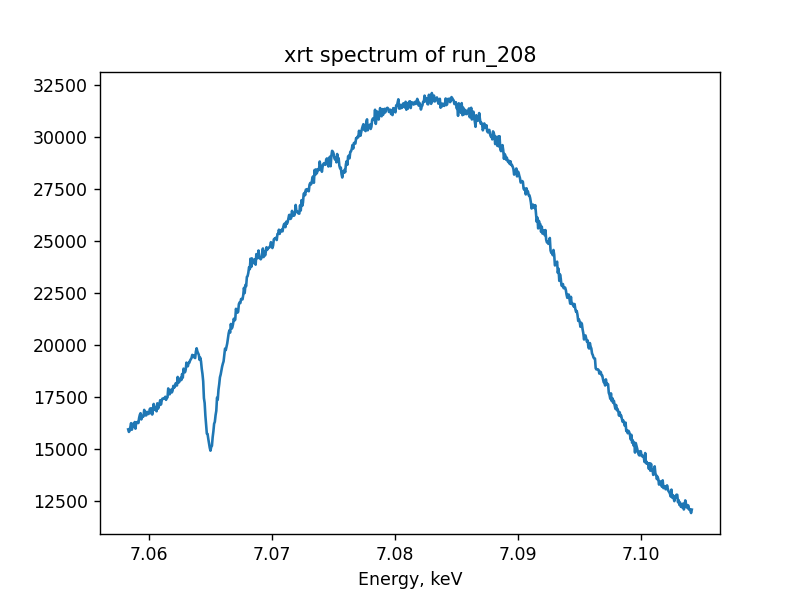

<IPython.core.display.Javascript object>


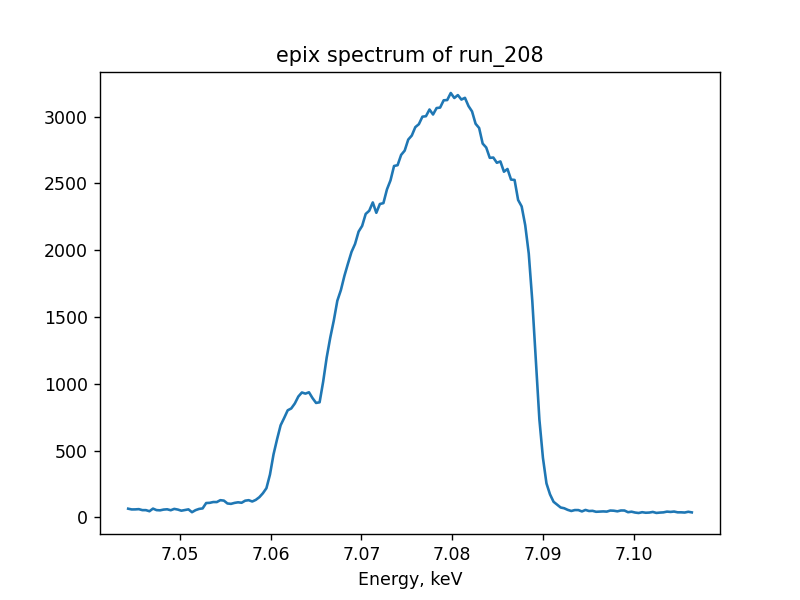

<IPython.core.display.Javascript object>


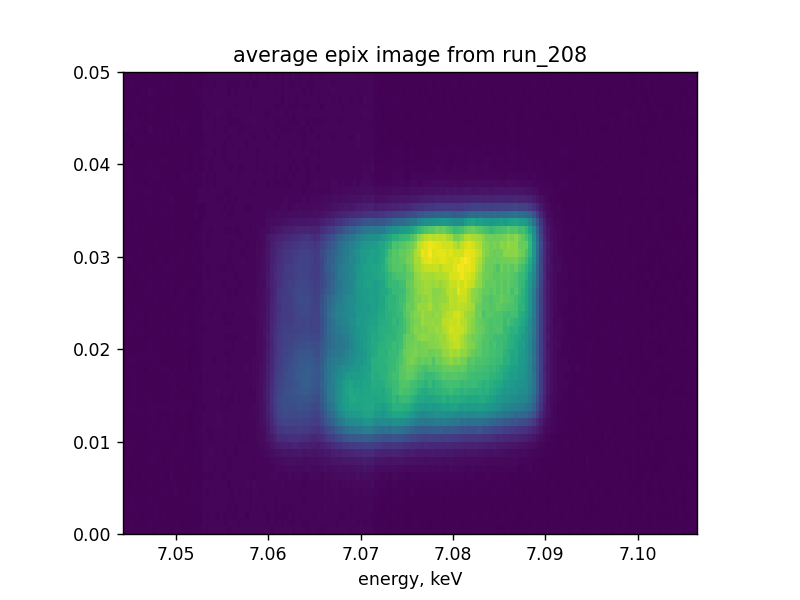

<IPython.core.display.Javascript object>


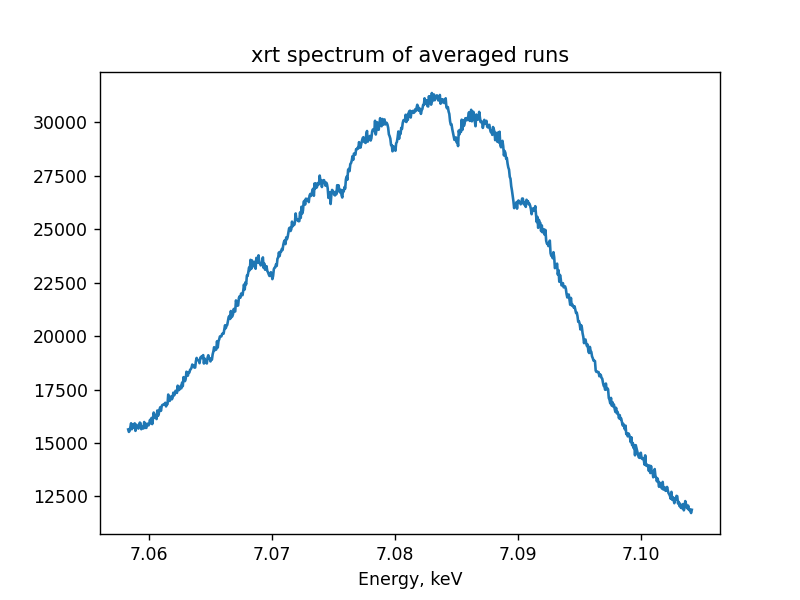

<IPython.core.display.Javascript object>


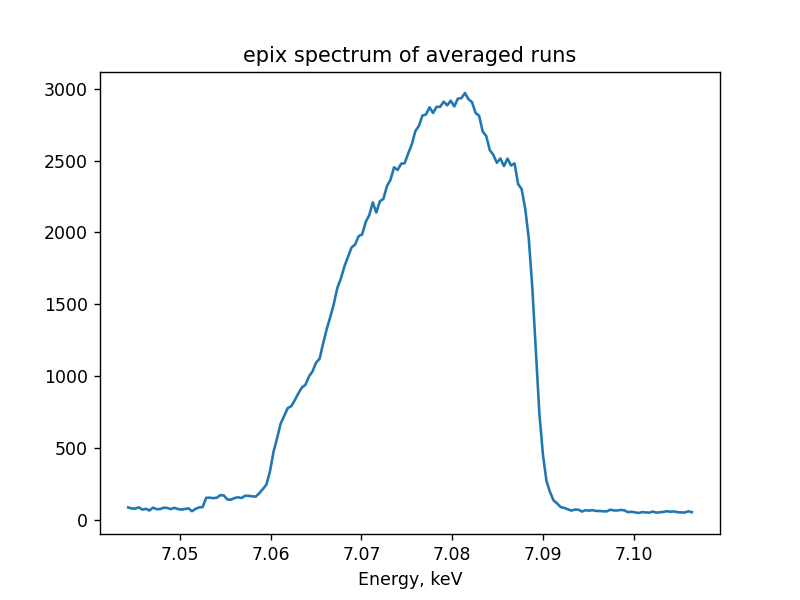

In [10]:
# Raw Data
raw_datas = []
for run in runs:
    scan_name = 'run_' + f'{run:03}'
    ds_string = 'exp=cxix46119:run='+str(run)+':smd'
    print(ds_string)
    if process_raw:
        raw_data = load_data.load_data(save_dir,scan_name,ds_string,epix_roi,xrt_roi)
    else:
        if os.path.exists(save_dir + scan_name + "/" + "rawdata.pkl"):
            with open(save_dir + scan_name + "/" + "rawdata.pkl", "rb") as f:
                raw_data = pickle.load(f)
        else:
            print('You are trying to load a file that does not exist.')
    if os.path.exists(save_dir + scan_name + "/" + "rawdata.pkl"):
        raw_datas = raw_datas + [raw_data]

[load_data.add_cal_info(raw_datas[i],to_cal_file) for i in range(0,len(raw_datas))]
plot_raw.plot_raw(raw_datas, plot_one, x_axis, on_off,to_cal_file)

In [12]:
# Inputs for filters

# filters = [filter0,filter1, ...,filterN]

            # filterX[0] = On/Off # True or False
            # filterX[1] = Type # 'linearity','bounds','rms'
            # filterX[2] = [par0,par1,...,parN]
            
                # If Type = 'bounds'    # par0 = 'key_0' # key_X is string from raw_data.getKeys()
                                        # par1 = lower bound # check raw_data.keyX for starting point 
                                        # par2 = upper bound # can leave blank if no upper bound
                                        # par3 = number of stds from median allowed
            
                # If Type = 'linearity' # par0 = 'key_0','key_1' # key_0 and key_1 and x and y values, respectively
                                        # par1 = width of filter
                        
                # If Type = 'rms'       # TBD
                
# filterX[3] = plot_on # True or False
                
                
                
test_param = [True,'linearity',['low_diode_us','epixI',4],]
print(raw_data.getKeys())

raw_data.pulse_energies_fee[0]
epix_roi[1]-epix_roi[0]

dict_keys(['eventIDs', 'photon_energies', 'I0_fee', 'high_diode_us', 'low_diode_us', 'epix_roi', 'xrt_roi', 'epix_spectrum', 'xrt_spectrum', 'avg_epix_2d', 'xrt_intensity', 'epix_intensity', 'scan_name', 'epix_motor', 'eventIDS', 'pulse_energies_fee', 'save_dir', 'ds_string', 'calibration_info', 'previous_cal'])


60

In [11]:
# Overlapping Data: matches energy ranges, resolutions, spectrometer response, and normalizes

# Need to have new directory inputs that correspond to pump only or probe only runs.

In [7]:
# Filtering Raw Data: filter[0] = 'filter_name'
                    # filter[1] = True/False to turn on/off that filter
                    # filter[2:end] = 1 value per index
filter1 = ['xx',True,1,1,1,1]
filter2 = ['yy',True,2,2,2]
filter3 = ['zz',False,3]


filter_parameters = [filter1, filter2, filter3]
which_filters = [filter_parameters[i][1] for i in range(0,len(filter_parameters))]
filters_to_use = [filter_parameters[i] for i in range(0,len(filter_parameters)) if which_filters[i]==True]
filters_to_use

[['xx', True, 1, 1, 1, 1], ['yy', True, 2, 2, 2]]